# imports

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Table for average household income verses murder index in San Diego county

In [148]:
income_murder_raw = pd.read_csv('household_income_vs_murder_index.csv')
income_murder_raw

# cleaning data
income_murder = income_murder_raw.get(['FIPS', 'AVGHINC_CY', 'CRMCYMURD'])
income_murder

# rename column name
income_murder = (income_murder.assign(average_household_income = income_murder.get('AVGHINC_CY'),
                                      murder_index = income_murder.get('CRMCYMURD'),
                                      San_Diego_census_tract_number = income_murder.get('FIPS'))
                )
# cleaning data
income_murder = income_murder.drop(columns = ['AVGHINC_CY', 'CRMCYMURD', 'FIPS'])
income_murder = income_murder.set_index('San_Diego_census_tract_number')
income_murder

# delete meaningless data
income_murder = (income_murder[(income_murder.get('average_household_income') > 0) & 
                               (income_murder.get('murder_index') > 0)]
                )
income_murder

# classify the data based on the murder index, and labeling
def classification (values):
    if values >= 126:
        return 'High Murder Index'
    elif (values < 126) & (values >= 53):
        return 'Medium Murder Index'
    else:
        return 'Low Murder Index'
    
# Adding labels to a new column
income_murder = income_murder.assign(murder_index_level = income_murder.get('murder_index'))
income_murder = (income_murder.assign(murder_index_level = income_murder.get('murder_index')
                                                                                          .apply(classification))
                      )
income_murder

,average_household_income,murder_index,murder_index_level
San_Diego_census_tract_number,,,
6073020109,98031.0,42.0,Low Murder Index
6073017010,141107.0,9.0,Low Murder Index
6073020027,149719.0,8.0,Low Murder Index
6073017034,139612.0,15.0,Low Murder Index
6073017501,166988.0,4.0,Low Murder Index
...,...,...,...
6073008339,88171.0,41.0,Low Murder Index
6073020107,101953.0,19.0,Low Murder Index
6073019701,73599.0,18.0,Low Murder Index


# A | B testing; confidence interval

Text(0, 0.5, 'Frequency')

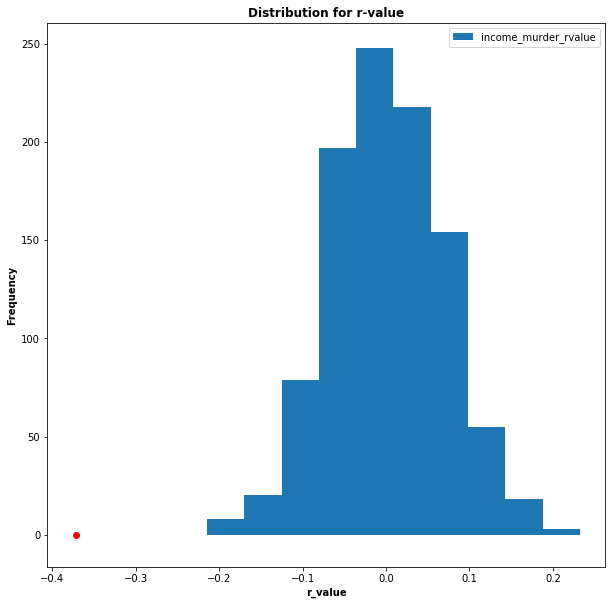

In [149]:
# import
from scipy import stats

income_murder

# shuffling columns "murder index", and calculate the r-value for each round
possible_correlation_1 = np.array([])

for i in np.arange(1000):
    shuffling_1 = np.random.permutation(income_murder.get('murder_index'))
    income_murder_shuffle = income_murder.assign(income_murder_shuffling = shuffling_1)
    rvalue_1ab = (stats.pearsonr(income_murder_shuffle.get('average_household_income'), 
                                income_murder_shuffle.get('income_murder_shuffling'))[0]
                 )
    possible_correlation_1 = np.append(possible_correlation_1, rvalue_1ab)

# visualize the distribution for r-values of each round, and plot the red dot for the real r-value
y1 = income_murder.get('murder_index')
x1 = income_murder.get('average_household_income')
pd.DataFrame().assign(income_murder_rvalue = possible_correlation_1).plot(kind = 'hist')
plt.scatter(stats.pearsonr(x1, y1)[0], 0 , color = 'red')
plt.title('Distribution for r-value', fontweight='bold')
plt.gcf().set_size_inches((10, 10))
plt.xlabel('r_value', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')

# From the graph, we can see the red dot is far away from the main distribution. 
# It tell us there are correlation between two variable, and it is not due to random chance.

# Visualizing the correlation between average household income and murder index, with statistic summary, such as r-square, p-value, regression line equation

Statistic Summary:
y = -0.0004042794567527763x + 91.2861765029504
R value is -0.3714757697992417
R-squared value is 0.1379942475479392
P value is 1.4273055552517142e-08


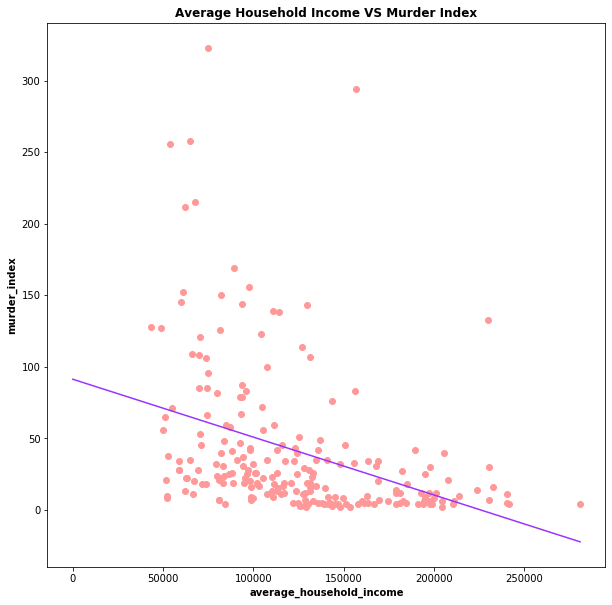

In [150]:
# making scatter plots for visualization
y1 = income_murder.get('murder_index')
x1 = income_murder.get('average_household_income')

# Give title for graph; set the color for each dots
plt.scatter(x1, y1, color = '#ff9999')
plt.title('Average Household Income VS Murder Index', fontweight='bold')

# Add axis label
plt.xlabel('average_household_income', fontweight='bold')
plt.ylabel('murder_index', fontweight='bold')

# produce regression (best fit line) line
model_1 = np.polyfit(x1, y1, 1)
predict_1 = np.poly1d(model_1)

# calculate r-squared value
r_matrix_1 = np.corrcoef(x1, y1)
r_1 = r_matrix_1[0,1]
r2_1 = r_1 ** 2

# calculate p-value
from scipy import stats
pvalue_1 = stats.pearsonr(x1, y1)[1]

# visualize the regression line
x_lin_reg_1 = range(0, int(x1.max()))
y_lin_reg_1 = predict_1(x_lin_reg_1)
plt.plot(x_lin_reg_1, y_lin_reg_1, c = '#9933ff')
plt.gcf().set_size_inches((10, 10))

# print out the equation for regression line and corresponding r-squared values
print('Statistic Summary:')
print("y " + "= " + str(model_1[0]) + 'x ' + '+ ' + str(model_1[1]))
print('R value is ' + str(r_1))
print('R-squared value is ' + str(r2_1))
print('P value is ' + str(pvalue_1))


# Table for average household income verses robbery index in San Diego county

In [151]:
income_robbery_raw = pd.read_csv('household_income_vs_robbery_index.csv')
income_robbery_raw

# cleaning data
income_robbery = income_robbery_raw.get(['FIPS', 'AVGHINC_CY', 'CRMCYROBB'])
income_robbery


# rename column name
income_robbery = (income_robbery.assign(average_household_income = income_robbery.get('AVGHINC_CY'),
                                       robbery_index = income_robbery.get('CRMCYROBB'),
                                       San_Diego_census_tract_number = income_robbery.get('FIPS'))
                )
# cleaning data
income_robbery = income_robbery.drop(columns = ['AVGHINC_CY', 'CRMCYROBB', 'FIPS'])
income_robbery = income_robbery.set_index('San_Diego_census_tract_number')
income_robbery

# delete meaningless data
income_robbery = (income_robbery[(income_robbery.get('average_household_income') > 0) & 
                               (income_robbery.get('robbery_index') > 0)]
                )
income_robbery

# classify the data based on the robbery index, and labeling
def classification_robbery (values):
    if values >= 107:
        return 'High Robbery Index'
    elif (values < 107) & (values >= 52):
        return 'Medium Robbery Index'
    else:
        return 'Low Robbery Index'
    
# Adding labels to a new column
income_robbery = income_robbery.assign(robbery_index_level = income_robbery.get('robbery_index'))
income_robbery = (income_robbery.assign(robbery_index_level = income_robbery.get('robbery_index')
                                .apply(classification_robbery))
                      )
income_robbery

,average_household_income,robbery_index,robbery_index_level
San_Diego_census_tract_number,,,
6073017106,230201.0,69.0,Medium Robbery Index
6073017104,153316.0,5.0,Low Robbery Index
6073017107,204324.0,6.0,Low Robbery Index
6073017108,160258.0,19.0,Low Robbery Index
6073017109,182747.0,53.0,Medium Robbery Index
...,...,...,...
6073020809,95722.0,101.0,Medium Robbery Index
6073020902,110753.0,162.0,High Robbery Index
6073020904,93463.0,164.0,High Robbery Index


# A | B testing; confidence interval

Text(0, 0.5, 'Frequency')

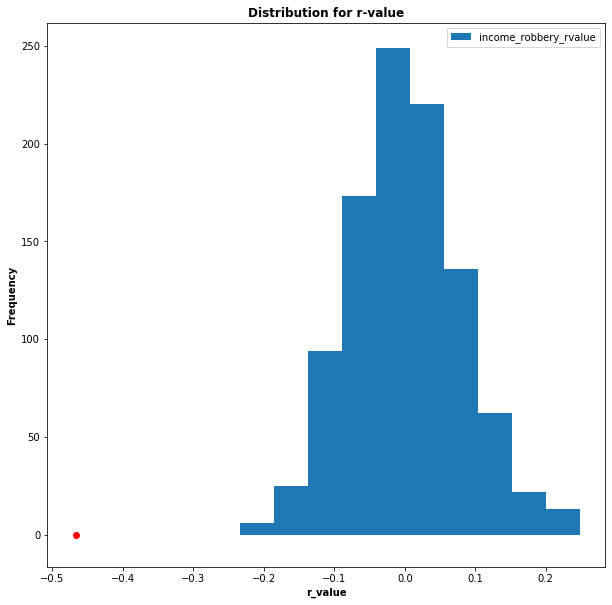

In [152]:
# import
from scipy import stats

income_robbery

# shuffling columns "robbery index", and calculate the r-value for each round
possible_correlation_2 = np.array([])

for i in np.arange(1000):
    shuffling_2 = np.random.permutation(income_robbery.get('robbery_index'))
    income_robbery_shuffle = income_robbery.assign(income_robbery_shuffling = shuffling_2)
    rvalue_2ab = (stats.pearsonr(income_robbery_shuffle.get('average_household_income'), 
                                income_robbery_shuffle.get('income_robbery_shuffling'))[0]
                 )
    possible_correlation_2 = np.append(possible_correlation_2, rvalue_2ab)

# visualize the distribution for r-values of each round, and plot the red dot for the real r-value
y2 = income_robbery.get('robbery_index')
x2 = income_robbery.get('average_household_income')
pd.DataFrame().assign(income_robbery_rvalue = possible_correlation_2).plot(kind = 'hist')
plt.scatter(stats.pearsonr(x2, y2)[0], 0 , color = 'red')
plt.title('Distribution for r-value', fontweight='bold')
plt.gcf().set_size_inches((10, 10))
plt.xlabel('r_value', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
# From the graph, we can see the red dot is far away from the main distribution. 
# It tell us there are correlation between two variable, and it is not due to random chance.

# Visualizing the correlation between average household income and robbery index, with statistic summary, such as r-square, p-value, regression line equation

Statistic Summary:
y = -0.0009421105807451566x + 179.25153282920314
R value is -0.46669005436169064
R-squared value is 0.21779960684011776
P value is 5.628856602677929e-10


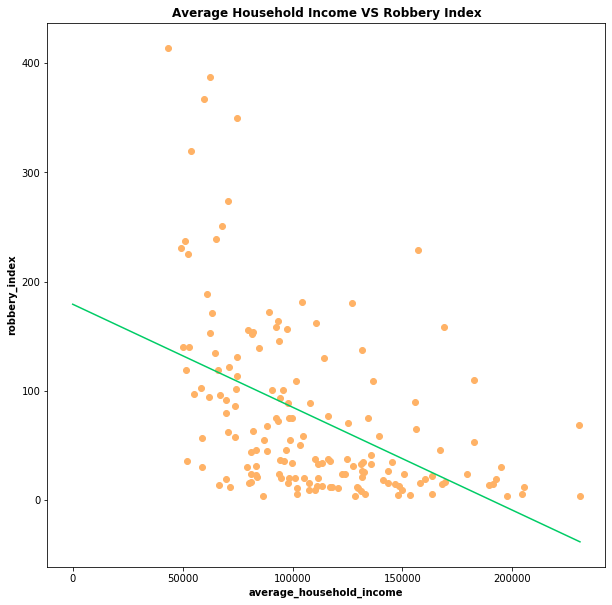

In [153]:
# making scatter plots for visualization
y2 = income_robbery.get('robbery_index')
x2 = income_robbery.get('average_household_income')

# Give title for graph; set the color for each dots
plt.scatter(x2, y2, color = '#ffb266')
plt.title('Average Household Income VS Robbery Index', fontweight='bold')

# Add axis label
plt.xlabel('average_household_income', fontweight='bold')
plt.ylabel('robbery_index', fontweight='bold')

# produce regression (best fit line) line
model_2 = np.polyfit(x2, y2, 1)
predict_2 = np.poly1d(model_2)

# calculate r-squared and r value
r_matrix_2 = np.corrcoef(x2, y2)
r_2 = r_matrix_2[0,1]
r2_2 = r_2 ** 2

# calculate p-value
from scipy import stats
pvalue_2 = stats.pearsonr(x2, y2)[1]

# visualize the regression line
x_lin_reg_2 = range(0, int(x2.max()))
y_lin_reg_2 = predict_2(x_lin_reg_2)
plt.plot(x_lin_reg_2, y_lin_reg_2, c = '#00cc66')
plt.gcf().set_size_inches((10, 10))

# print out the equation for regression line and corresponding r-squared values
print('Statistic Summary:')
print("y " + "= " + str(model_2[0]) + 'x ' +  '+ ' + str(model_2[1]))
print('R value is ' + str(r_2))
print('R-squared value is ' + str(r2_2))
print('P value is ' + str(pvalue_2))


# Table for average household income verses rape index in San Diego county

In [154]:
income_rape_raw = pd.read_csv('household_income_vs_rape_index.csv')
income_rape_raw

# cleaning data
income_rape = income_rape_raw.get(['FIPS', 'AVGHINC_CY', 'CRMCYRAPE'])
income_rape

# rename column name
income_rape = (income_rape.assign(average_household_income = income_rape.get('AVGHINC_CY'),
                                      rape_index = income_rape.get('CRMCYRAPE'),
                                      San_Diego_census_tract_number = income_rape.get('FIPS'))
                )
# cleaning data
income_rape = income_rape.drop(columns = ['AVGHINC_CY', 'CRMCYRAPE', 'FIPS'])
income_rape = income_rape.set_index('San_Diego_census_tract_number')
income_rape

# delete meaningless data
income_rape = (income_rape[(income_rape.get('average_household_income') > 0) & 
                               (income_rape.get('rape_index') > 0)]
                )
income_rape

# classify the data based on the rape index, and labeling
def classification_rape (values):
    if values >= 131:
        return 'High Rape Index'
    elif (values < 131) & (values >= 86):
        return 'Medium Rape Index'
    else:
        return 'Low Rape Index'
    
# Adding labels to a new column
income_rape = income_rape.assign(rape_index_level = income_rape.get('rape_index'))
income_rape = (income_rape.assign(rape_index_level = income_rape.get('rape_index')
                          .apply(classification_rape))
                      )
income_rape

,average_household_income,rape_index,rape_index_level
San_Diego_census_tract_number,,,
6073013601,125163.0,47.0,Low Rape Index
6073017808,192601.0,56.0,Low Rape Index
6073007702,87375.0,51.0,Low Rape Index
6073008358,99626.0,100.0,Medium Rape Index
6073018511,69526.0,123.0,Medium Rape Index
...,...,...,...
6073017104,153316.0,23.0,Low Rape Index
6073003303,47930.0,89.0,Medium Rape Index
6073020710,189518.0,97.0,Medium Rape Index


# A | B testing; confidence interval

Text(0, 0.5, 'Frequency')

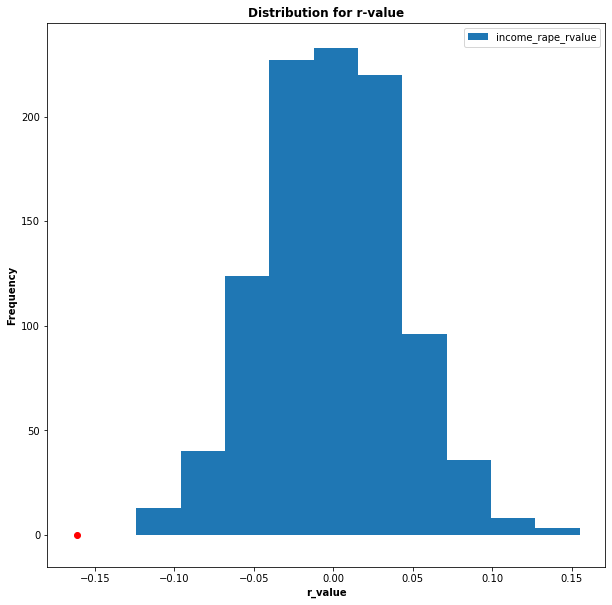

In [155]:
# import
from scipy import stats

income_rape

# shuffling columns "rape index", and calculate the r-value for each round
possible_correlation_3 = np.array([])

for i in np.arange(1000):
    shuffling_3 = np.random.permutation(income_rape.get('rape_index'))
    income_rape_shuffle = income_rape.assign(income_rape_shuffling = shuffling_3)
    rvalue_3ab = (stats.pearsonr(income_rape_shuffle.get('average_household_income'), 
                                income_rape_shuffle.get('income_rape_shuffling'))[0]
                 )
    possible_correlation_3 = np.append(possible_correlation_3, rvalue_3ab)

# visualize the distribution for r-values of each round, and plot the red dot for the real r-value
y3 = income_rape.get('rape_index')
x3 = income_rape.get('average_household_income')
pd.DataFrame().assign(income_rape_rvalue = possible_correlation_3).plot(kind = 'hist')
plt.scatter(stats.pearsonr(x3, y3)[0], 0 , color = 'red')
plt.title('Distribution for r-value', fontweight='bold')
plt.gcf().set_size_inches((10, 10))
plt.xlabel('r_value', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
# From the graph, we can see the red dot is far away from the main distribution. 
# It tell us there are correlation between two variable, and it is not due to random chance.

# Visualizing the correlation between average household income and rape index, with statistic summary, such as r-square, p-value, regression line equation

Statistic Summary:
y = -0.00018508552875060643x + 95.82001791250997
R value is -0.16140457582230458
R-squared value is 0.02605143709637807
P value is 0.00016309104508716005


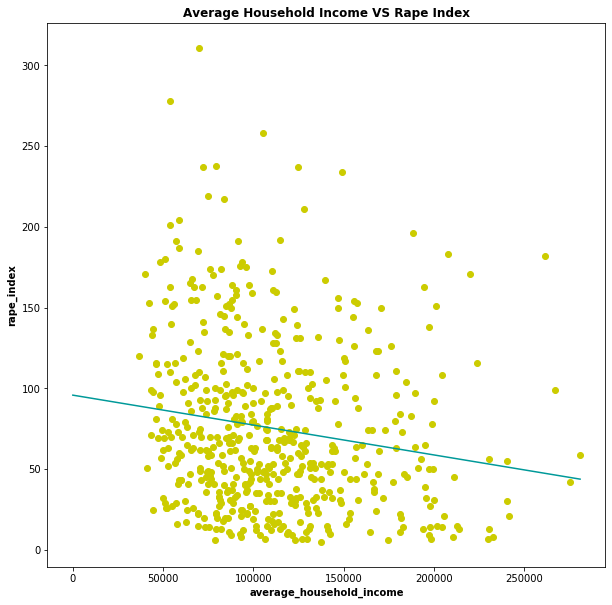

In [156]:
# making scatter plots for visualization
y3 = income_rape.get('rape_index')
x3 = income_rape.get('average_household_income')

# Give title for graph; set the color for each dots
plt.scatter(x3, y3, color = '#cccc00')
plt.title('Average Household Income VS Rape Index', fontweight='bold')

# Add axis label
plt.xlabel('average_household_income', fontweight='bold')
plt.ylabel('rape_index', fontweight='bold')

# produce regression (best fit line) line
model_3 = np.polyfit(x3, y3, 1)
predict_3 = np.poly1d(model_3)

# calculate r-squared and r value
r_matrix_3 = np.corrcoef(x3, y3)
r_3 = r_matrix_3[0,1]
r2_3 = r_3 ** 2

# calculate p-value
from scipy import stats
pvalue_3 = stats.pearsonr(x3, y3)[1]

# visualize the regression line
x_lin_reg_3 = range(0, int(x3.max()))
y_lin_reg_3 = predict_3(x_lin_reg_3)
plt.plot(x_lin_reg_3, y_lin_reg_3, c = '#009999')
plt.gcf().set_size_inches((10, 10))

# print out the equation for regression line and corresponding r-squared values
print('Statistic Summary:')
print("y " + "= " + str(model_3[0]) + 'x ' + '+ ' + str(model_3[1]))
print('R value is ' + str(r_3))
print('R-squared value is ' + str(r2_3))
print('P value is ' + str(pvalue_3))

# Table for average home value verses murder index in San Diego county

In [157]:
home_value_murder_raw = pd.read_csv('home_value_vs_murder_index.csv')
home_value_murder_raw

# cleaning data
home_value_murder = home_value_murder_raw.get(['FIPS', 'AVGVAL_CY', 'CRMCYMURD'])
home_value_murder

# rename column name
home_value_murder = (home_value_murder.assign(average_home_value = home_value_murder.get('AVGVAL_CY'),
                                              murder_index = home_value_murder.get('CRMCYMURD'),
                                              San_Diego_census_tract_number = home_value_murder.get('FIPS'))
                )
# cleaning data
home_value_murder = home_value_murder.drop(columns = ['AVGVAL_CY', 'CRMCYMURD', 'FIPS'])
home_value_murder = home_value_murder.set_index('San_Diego_census_tract_number')
home_value_murder

# delete meaningless data
home_value_murder = (home_value_murder[(home_value_murder.get('average_home_value') > 0) & 
                               (home_value_murder.get('murder_index') > 0)]
                )
home_value_murder

# classify the data based on the murder index, and labeling
def classification (values):
    if values >= 126:
        return 'High Murder Index'
    elif (values < 126) & (values >= 53):
        return 'Medium Murder Index'
    else:
        return 'Low Murder Index'
    
# Adding labels to a new column
home_value_murder = home_value_murder.assign(murder_index_level = home_value_murder.get('murder_index'))
home_value_murder = (home_value_murder.assign(murder_index_level = home_value_murder.get('murder_index')
                                                                                          .apply(classification))
                      )
home_value_murder

,average_home_value,murder_index,murder_index_level
San_Diego_census_tract_number,,,
6073018906,529195.0,25.0,Low Murder Index
6073002712,319329.0,102.0,Medium Murder Index
6073020023,491815.0,8.0,Low Murder Index
6073007702,908984.0,18.0,Low Murder Index
6073009301,597041.0,21.0,Low Murder Index
...,...,...,...
6073005400,983568.0,64.0,Medium Murder Index
6073014901,765858.0,19.0,Low Murder Index
6073018610,570000.0,79.0,Medium Murder Index


# A | B testing; confidence interval

Text(0, 0.5, 'Frequency')

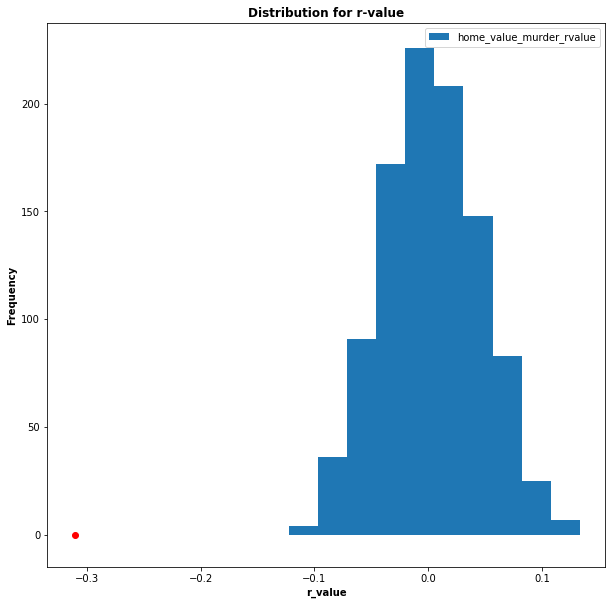

In [158]:
# import
from scipy import stats

home_value_murder

# shuffling columns "murder index", and calculate the r-value for each round
possible_correlation_4 = np.array([])

for i in np.arange(1000):
    shuffling_4 = np.random.permutation(home_value_murder.get('murder_index'))
    home_value_murder_shuffle = home_value_murder.assign(home_value_murder_shuffling = shuffling_4)
    rvalue_4ab = (stats.pearsonr(home_value_murder_shuffle.get('average_home_value'), 
                                home_value_murder_shuffle.get('home_value_murder_shuffling'))[0]
                 )
    possible_correlation_4 = np.append(possible_correlation_4, rvalue_4ab)

# visualize the distribution for r-values of each round, and plot the red dot for the real r-value
y4 = home_value_murder.get('murder_index')
x4 = home_value_murder.get('average_home_value')
pd.DataFrame().assign(home_value_murder_rvalue = possible_correlation_4).plot(kind = 'hist')
plt.scatter(stats.pearsonr(x4, y4)[0], 0 , color = 'red')
plt.title('Distribution for r-value', fontweight='bold')
plt.gcf().set_size_inches((10, 10))
plt.xlabel('r_value', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
# From the graph, we can see the red dot is far away from the main distribution. 
# It tell us there are correlation between two variable, and it is not due to random chance.

# Visualizing the correlation between average home value and murder index, with statistic summary, such as r-square, p-value, regression line equation

Statistic Summary:
y = -5.8025420385750564e-05x + 88.03252401379632
R value is -0.3099800439867244
R-squared value is 0.0960876276700116
P value is 6.767381145239242e-15


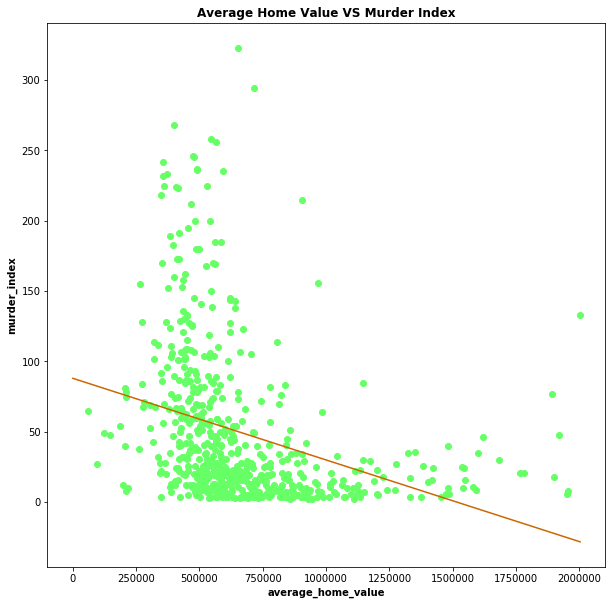

In [159]:
# making scatter plots for visualization
y4 = home_value_murder.get('murder_index')
x4 = home_value_murder.get('average_home_value')

# Give title for graph; set the color for each dots
plt.scatter(x4, y4, color = '#66ff66')
plt.title('Average Home Value VS Murder Index', fontweight='bold')

# Add axis label
plt.xlabel('average_home_value', fontweight='bold')
plt.ylabel('murder_index', fontweight='bold')

# produce regression (best fit line) line
model_4 = np.polyfit(x4, y4, 1)
predict_4 = np.poly1d(model_4)

# calculate r-squared and r value
r_matrix_4 = np.corrcoef(x4, y4)
r_4 = r_matrix_4[0,1]
r2_4 = r_4 ** 2

# calculate p-value
from scipy import stats
pvalue_4 = stats.pearsonr(x4, y4)[1]

# visualize the regression line
x_lin_reg_4 = range(0, int(x4.max()))
y_lin_reg_4 = predict_4(x_lin_reg_4)
plt.plot(x_lin_reg_4, y_lin_reg_4, c = '#cc6600')
plt.gcf().set_size_inches((10, 10))

# print out the equation for regression line and corresponding r-squared values
print('Statistic Summary:')
print("y " + "= " + str(model_4[0]) + 'x ' + '+ ' + str(model_4[1]))
print('R value is ' + str(r_4))
print('R-squared value is ' + str(r2_4))
print('P value is ' + str(pvalue_4))

# Table for average home value verses robbery index in San Diego county

In [160]:
home_value_robbery_raw = pd.read_csv('home_value_vs_robbery_index.csv')
home_value_robbery_raw

# cleaning data
home_value_robbery = home_value_robbery_raw.get(['FIPS', 'AVGVAL_CY', 'CRMCYROBB'])
home_value_robbery


# rename column name
home_value_robbery = (home_value_robbery.assign(average_home_value = home_value_robbery.get('AVGVAL_CY'),
                                       robbery_index = home_value_robbery.get('CRMCYROBB'),
                                       San_Diego_census_tract_number = home_value_robbery.get('FIPS'))
                )
# cleaning data
home_value_robbery = home_value_robbery.drop(columns = ['AVGVAL_CY', 'CRMCYROBB', 'FIPS'])
home_value_robbery = home_value_robbery.set_index('San_Diego_census_tract_number')
home_value_robbery

# delete meaningless data
home_value_robbery = (home_value_robbery[(home_value_robbery.get('average_home_value') > 0) & 
                               (home_value_robbery.get('robbery_index') > 0)]
                )
home_value_robbery

# classify the data based on the robbery index, and labeling
def classification_robbery (values):
    if values >= 107:
        return 'High Robbery Index'
    elif (values < 107) & (values >= 52):
        return 'Medium Robbery Index'
    else:
        return 'Low Robbery Index'
    
# Adding labels to a new column
home_value_robbery = home_value_robbery.assign(robbery_index_level = home_value_robbery.get('robbery_index'))
home_value_robbery = (home_value_robbery.assign(robbery_index_level = home_value_robbery.get('robbery_index')
                                                                                          .apply(classification_robbery))
                      )
home_value_robbery

,average_home_value,robbery_index,robbery_index_level
San_Diego_census_tract_number,,,
6073013601,679505.0,19.0,Low Robbery Index
6073017808,1063944.0,19.0,Low Robbery Index
6073007702,908984.0,49.0,Low Robbery Index
6073008358,516170.0,29.0,Low Robbery Index
6073018511,533067.0,19.0,Low Robbery Index
...,...,...,...
6073017104,930238.0,5.0,Low Robbery Index
6073003303,585629.0,203.0,High Robbery Index
6073020710,920481.0,14.0,Low Robbery Index


# A | B testing; confidence interval

Text(0, 0.5, 'Frequency')

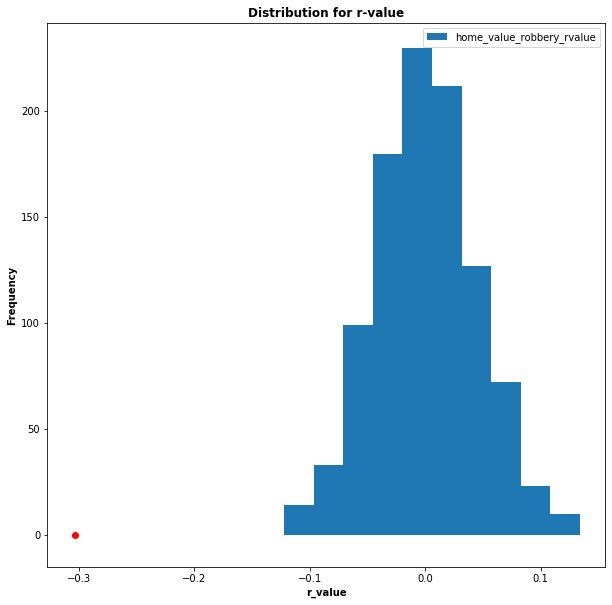

In [161]:
# import
from scipy import stats

home_value_robbery

# shuffling columns "robbery index", and calculate the r-value for each round
possible_correlation_5 = np.array([])

for i in np.arange(1000):
    shuffling_5 = np.random.permutation(home_value_robbery.get('robbery_index'))
    home_value_robbery_shuffle = home_value_robbery.assign(home_value_robbery_shuffling = shuffling_5)
    rvalue_5ab = (stats.pearsonr(home_value_robbery_shuffle.get('average_home_value'), 
                                home_value_robbery_shuffle.get('home_value_robbery_shuffling'))[0]
                 )
    possible_correlation_5 = np.append(possible_correlation_5, rvalue_5ab)

# visualize the distribution for r-values of each round, and plot the red dot for the real r-value
y5 = home_value_robbery.get('robbery_index')
x5 = home_value_robbery.get('average_home_value')
pd.DataFrame().assign(home_value_robbery_rvalue = possible_correlation_5).plot(kind = 'hist')
plt.scatter(stats.pearsonr(x5, y5)[0], 0 , color = 'red')
plt.title('Distribution for r-value', fontweight='bold')
plt.gcf().set_size_inches((10, 10))
plt.xlabel('r_value', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
# From the graph, we can see the red dot is far away from the main distribution. 
# It tell us there are correlation between two variable, and it is not due to random chance.

# Visualizing the correlation between average home value and robbery index, with statistic summary, such as r-square, p-value, regression line equation

Statistic Summary:
y = -9.553909355876393e-05x + 152.219030841975
R value is -0.3027584894515207
R-squared value is 0.09166270293496656
P value is 8.36445942891716e-13


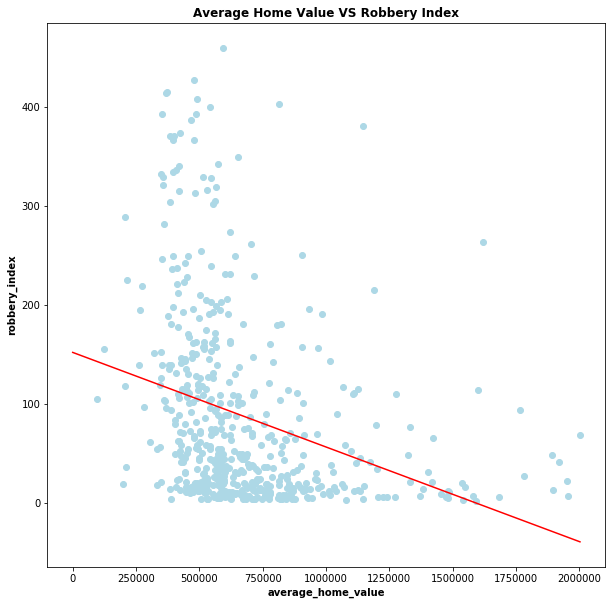

In [162]:
# making scatter plots for visualization
y5 = home_value_robbery.get('robbery_index')
x5 = home_value_robbery.get('average_home_value')

# Give title for graph; set the color for each dots
plt.scatter(x5, y5, color = '#ADD8E6')
plt.title('Average Home Value VS Robbery Index', fontweight='bold')

# Add axis label
plt.xlabel('average_home_value', fontweight='bold')
plt.ylabel('robbery_index', fontweight='bold')

# produce regression (best fit line) line
model_5 = np.polyfit(x5, y5, 1)
predict_5 = np.poly1d(model_5)

# calculate r-squared and r value
r_matrix_5 = np.corrcoef(x5, y5)
r_5 = r_matrix_5[0,1]
r2_5 = r_5 ** 2

# calculate p-value
from scipy import stats
pvalue_5 = stats.pearsonr(x5, y5)[1]

# visualize the regression line
x_lin_reg_5 = range(0, int(x5.max()))
y_lin_reg_5 = predict_5(x_lin_reg_5)
plt.plot(x_lin_reg_5, y_lin_reg_5, c = 'red')
plt.gcf().set_size_inches((10, 10))

# print out the equation for regression line and corresponding r-squared values
print('Statistic Summary:')
print("y " + "= " + str(model_5[0]) + 'x ' + '+ ' + str(model_5[1]))
print('R value is ' + str(r_5))
print('R-squared value is ' + str(r2_5))
print('P value is ' + str(pvalue_5))

# Table for average home value verses rape index in San Diego county

In [163]:
home_value_rape_raw = pd.read_csv('home_value_vs_rape_index.csv')
home_value_rape_raw

# cleaning data
home_value_rape = home_value_rape_raw.get(['FIPS', 'AVGVAL_CY', 'CRMCYRAPE'])
home_value_rape

# rename column name
home_value_rape = (home_value_rape.assign(average_home_value = home_value_rape.get('AVGVAL_CY'),
                                      rape_index = home_value_rape.get('CRMCYRAPE'),
                                      San_Diego_census_tract_number = home_value_rape.get('FIPS'))
                )
# cleaning data
home_value_rape = home_value_rape.drop(columns = ['AVGVAL_CY', 'CRMCYRAPE', 'FIPS'])
home_value_rape = home_value_rape.set_index('San_Diego_census_tract_number')
home_value_rape

# delete meaningless data
home_value_rape = (home_value_rape[(home_value_rape.get('average_home_value') > 0) & 
                               (home_value_rape.get('rape_index') > 0)]
                )
home_value_rape

# classify the data based on the rape index, and labeling
def classification_rape (values):
    if values >= 131:
        return 'High Rape Index'
    elif (values < 131) & (values >= 86):
        return 'Medium Rape Index'
    else:
        return 'Low Rape Index'
    
# Adding labels to a new column
home_value_rape = home_value_rape.assign(rape_index_level = home_value_rape.get('rape_index'))
home_value_rape = (home_value_rape.assign(rape_index_level = home_value_rape.get('rape_index')
                          .apply(classification_rape))
                      )
home_value_rape

,average_home_value,rape_index,rape_index_level
San_Diego_census_tract_number,,,
6073008102,1781890.0,15.0,Low Rape Index
6073008301,1241279.0,126.0,Medium Rape Index
6073008311,1955461.0,42.0,Low Rape Index
6073008503,724589.0,44.0,Low Rape Index
6073008333,1202596.0,108.0,Medium Rape Index
...,...,...,...
6073020809,580524.0,36.0,Low Rape Index
6073020902,549861.0,22.0,Low Rape Index
6073020904,619687.0,79.0,Low Rape Index


# A | B testing; confidence interval

Text(0, 0.5, 'Frequency')

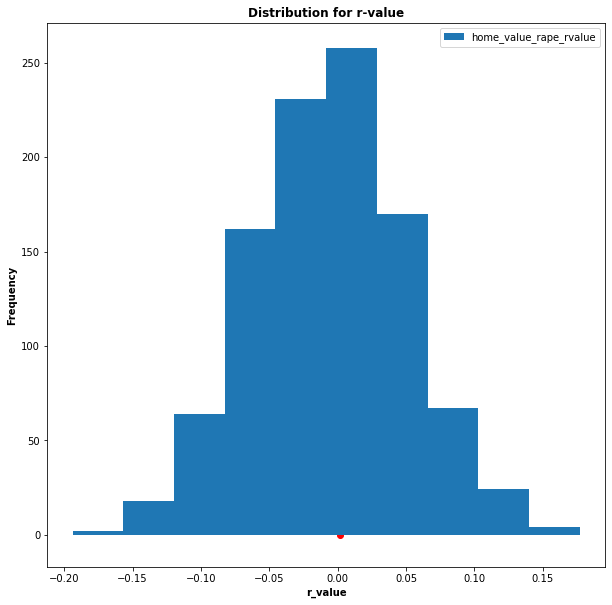

In [164]:
# import
from scipy import stats

home_value_rape

# shuffling columns "rape index", and calculate the r-value for each round
possible_correlation_6 = np.array([])

for i in np.arange(1000):
    shuffling_6 = np.random.permutation(home_value_rape.get('rape_index'))
    home_value_rape_shuffle = home_value_rape.assign(home_value_rape_shuffling = shuffling_6)
    rvalue_6ab = (stats.pearsonr(home_value_rape_shuffle.get('average_home_value'), 
                                home_value_rape_shuffle.get('home_value_rape_shuffling'))[0]
                 )
    possible_correlation_6 = np.append(possible_correlation_6, rvalue_6ab)

# visualize the distribution for r-values of each round, and plot the red dot for the real r-value
y6 = home_value_rape.get('rape_index')
x6 = home_value_rape.get('average_home_value')
pd.DataFrame().assign(home_value_rape_rvalue = possible_correlation_6).plot(kind = 'hist')
plt.scatter(stats.pearsonr(x6, y6)[0], 0 , color = 'red')
plt.title('Distribution for r-value', fontweight='bold')
plt.gcf().set_size_inches((10, 10))
plt.xlabel('r_value', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
# From the graph, we can see the red dot is inside the main distribution. 
# It tell us there are no obvious correlation between two variable, or the correlation may be due to random chance.

# Visualizing the correlation between average home value and rape index, with statistic summary, such as r-square, p-value, regression line equation

Statistic Summary:
y = 2.6522074720393594e-07x + 70.27528337611223
R value is 0.0017062386211373747
R-squared value is 2.9112502322607695e-06
P value is 0.9762864902433023


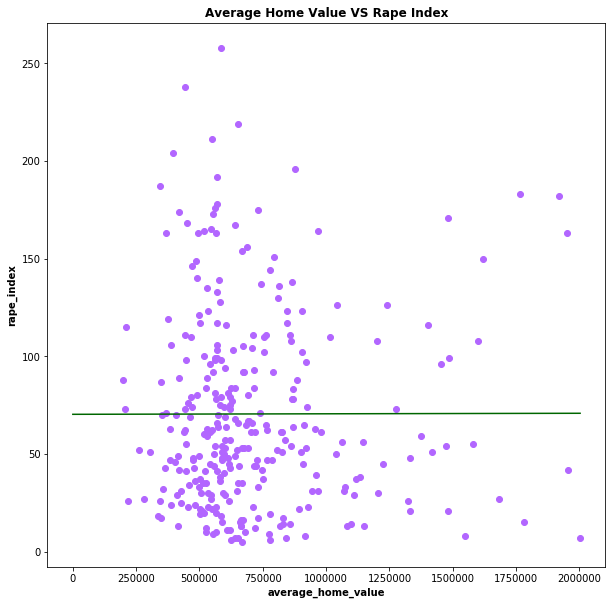

In [165]:
# making scatter plots for visualization
y6 = home_value_rape.get('rape_index')
x6 = home_value_rape.get('average_home_value')

# Give title for graph; set the color for each dots
plt.scatter(x6, y6, color = '#b266ff')
plt.title('Average Home Value VS Rape Index', fontweight='bold')

# Add axis label
plt.xlabel('average_home_value', fontweight='bold')
plt.ylabel('rape_index', fontweight='bold')

#produce regression (best fit line) line
model_6 = np.polyfit(x6, y6, 1)
predict_6 = np.poly1d(model_6)

# calculate r-squared and r value
r_matrix_6 = np.corrcoef(x6, y6)
r_6 = r_matrix_6[0,1]
r2_6 = r_6 ** 2

# calculate p-value
from scipy import stats
pvalue_6 = stats.pearsonr(x6, y6)[1]

# visualize the regression line
x_lin_reg_6 = range(0, int(x6.max()))
y_lin_reg_6 = predict_6(x_lin_reg_6)
plt.plot(x_lin_reg_6, y_lin_reg_6, c = '#006600')
plt.gcf().set_size_inches((10, 10))

# print out the equation for regression line and corresponding r-squared values
print('Statistic Summary:')
print("y " + "= " + str(model_6[0]) + 'x ' + '+ ' + str(model_6[1]))
print('R value is ' + str(r_6))
print('R-squared value is ' + str(r2_6))
print('P value is ' + str(pvalue_6))


# Machine learning: Cross validation 

In [166]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We will use three different models to test the accuracy for our six different combinations

# 1 LogisticRegression Model
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')

# 2 Support Vector Machine Model
svm_1 = SVC(gamma='scale')

# 3 Random Forest Classifier Model
rf_1 = RandomForestClassifier(n_estimators = 40)

# KFold testing (Enable us to perform five repeated test for three models)
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
kf

# calculate score for each model
def score_1(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# We will use models above to test six combinations

# First testing combination: "independent variable: average household income; dependent variable: murder index"

In [167]:
# table for average household income verses murder index in Denver county
denver_testing = pd.read_csv('Denver_testing.csv')
denver_testing

# cleaning data
cross_income_murder = denver_testing.get(['FIPS', 'AVGHINC_CY', 'CRMCYMURD'])
cross_income_murder


# rename column name
cross_income_murder = (cross_income_murder.assign(average_household_income = cross_income_murder.get('AVGHINC_CY'),
                                       murder_index = cross_income_murder.get('CRMCYMURD'),
                                       Denver_census_tract_number = cross_income_murder.get('FIPS'))
                )
# cleaning data
cross_income_murder = cross_income_murder.drop(columns = ['AVGHINC_CY', 'CRMCYMURD', 'FIPS'])
cross_income_murder = cross_income_murder.set_index('Denver_census_tract_number')
cross_income_murder

# delete meaningless data
cross_income_murder = (cross_income_murder[(cross_income_murder.get('average_household_income') > 0) & 
                               (cross_income_murder.get('murder_index') > 0)]
                )
cross_income_murder

# classify the data based on the murder index, and labeling
def classification (values):
    if values >= 126:
        return 'High Murder Index'
    elif (values < 126) & (values >= 53):
        return 'Medium Murder Index'
    else:
        return 'Low Murder Index'
    
# Adding labels to a new column
cross_income_murder = cross_income_murder.assign(murder_index_level = cross_income_murder.get('murder_index'))
cross_income_murder = (cross_income_murder.assign(murder_index_level = cross_income_murder.get('murder_index')
                                                                                          .apply(classification))
                      )
cross_income_murder

,average_household_income,murder_index,murder_index_level
Denver_census_tract_number,,,
8031004601,67921.0,146.0,High Murder Index
8031004700,80855.0,120.0,Medium Murder Index
8031004801,91124.0,129.0,High Murder Index
8031011902,79204.0,32.0,Low Murder Index
8031011903,95060.0,10.0,Low Murder Index
...,...,...,...
8031008389,105036.0,89.0,Medium Murder Index
8031008390,74834.0,46.0,Low Murder Index
8031008391,91622.0,27.0,Low Murder Index


# Begin testing (Testing results please see the table in next couple lines)

In [168]:
# testing table
cross_income_murder

# assign datas from two variables to two arrays
data_1 = np.array([cross_income_murder.get('average_household_income')]).transpose()
predicting_1 = np.array(cross_income_murder.get('murder_index_level'))

# splitting data into testing data and training data, and the ratio between testing and training is 3 : 7
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = (train_test_split(data_1,
                                                         predicting_1,
                                                         test_size = 0.3)
                                       )

# create arrays to collect score for 5 rounds (5 folds created by K-Fold method)
score_logistic_1 = np.array([])
score_svm_1 = np.array([])
score_rf_1 = np.array([])


# perform accuracy test by using three models for five rounds (5 folds), and assigned score to corresponding arrays
for train_index_1, test_index_1 in kf.split(data_1):
    X1_train, X1_test, y1_train, y1_test = (data_1[train_index_1],
                                            data_1[test_index_1],
                                            predicting_1[train_index_1],
                                            predicting_1[test_index_1]
                                           )
    
    score_logistic_1 = np.append(score_logistic_1, score_1(model_lr, X1_train, X1_test, y1_train, y1_test))
    score_svm_1 = np.append(score_svm_1, score_1(svm_1, X1_train, X1_test, y1_train, y1_test))  
    score_rf_1 = np.append(score_rf_1, score_1(rf_1, X1_train, X1_test, y1_train, y1_test))  

# Second testing combination: "independent variable: average household income; dependent variable: robbery index"

In [169]:
# table for average household income verses robbery index in Denver county
denver_testing = pd.read_csv('Denver_testing.csv')
denver_testing

# cleaning data
cross_income_robbery = denver_testing.get(['FIPS', 'AVGHINC_CY', 'CRMCYROBB'])
cross_income_robbery


# rename column name
cross_income_robbery = (cross_income_robbery.assign(average_household_income = cross_income_robbery.get('AVGHINC_CY'),
                                       robbery_index = cross_income_robbery.get('CRMCYROBB'),
                                       Denver_census_tract_number = cross_income_robbery.get('FIPS'))
                )
# cleaning data
cross_income_robbery = cross_income_robbery.drop(columns = ['AVGHINC_CY', 'CRMCYROBB', 'FIPS'])
cross_income_robbery = cross_income_robbery.set_index('Denver_census_tract_number')
cross_income_robbery

# delete meaningless data
cross_income_robbery = (cross_income_robbery[(cross_income_robbery.get('average_household_income') > 0) & 
                               (cross_income_robbery.get('robbery_index') > 0)]
                )

# classify the data based on the robbery index, and labeling
def classification_robbery (values):
    if values >= 107:
        return 'High Robbery Index'
    elif (values < 107) & (values >= 52):
        return 'Medium Robbery Index'
    else:
        return 'Low Robbery Index'
    
# Adding labels to a new column
cross_income_robbery = cross_income_robbery.assign(robbery_index_level = cross_income_robbery.get('robbery_index'))
cross_income_robbery = (cross_income_robbery.assign(robbery_index_level = cross_income_robbery.get('robbery_index')
                                                                                          .apply(classification_robbery))
                      )
cross_income_robbery

,average_household_income,robbery_index,robbery_index_level
Denver_census_tract_number,,,
8031004601,67921.0,121.0,High Robbery Index
8031004700,80855.0,107.0,High Robbery Index
8031004801,91124.0,94.0,Medium Robbery Index
8031011902,79204.0,20.0,Low Robbery Index
8031011903,95060.0,28.0,Low Robbery Index
...,...,...,...
8031008389,105036.0,183.0,High Robbery Index
8031008390,74834.0,69.0,Medium Robbery Index
8031008391,91622.0,30.0,Low Robbery Index


# Begin testing (Testing results please see the table in next couple lines)

In [170]:
# testing table
cross_income_rape

# assign datas from two variables to two arrays
data_3 = np.array([cross_income_rape.get('average_household_income')]).transpose()
predicting_3 = np.array(cross_income_rape.get('rape_index_level'))

# splitting data into testing data and training data, and the ratio between testing and training is 3 : 7
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = (train_test_split(data_3,
                                                         predicting_3,
                                                         test_size = 0.3)
                                       )

# create arrays to collect score for 5 rounds (5 folds created by K-Fold method)
score_logistic_3 = np.array([])
score_svm_3 = np.array([])
score_rf_3 = np.array([])


# perform accuracy test by using three models for five rounds (5 folds), and assigned score to corresponding arrays
for train_index_3, test_index_3 in kf.split(data_3):
    X3_train, X3_test, y3_train, y3_test = (data_3[train_index_3],
                                            data_3[test_index_3],
                                            predicting_3[train_index_3],
                                            predicting_3[test_index_3]
                                           )
    
    score_logistic_3 = np.append(score_logistic_3, score_1(model_lr, X3_train, X3_test, y3_train, y3_test))
    score_svm_3 = np.append(score_svm_3, score_1(svm_1, X3_train, X3_test, y3_train, y3_test))  
    score_rf_3 = np.append(score_rf_3, score_1(rf_1, X3_train, X3_test, y3_train, y3_test))  

# Fourth testing combination: "independent variable: average home value; dependent variable: murder index"

In [171]:
# table for average home value verses murder index in Denver county
denver_testing = pd.read_csv('Denver_testing.csv')
denver_testing

# cleaning data
cross_homevalue_murder = denver_testing.get(['FIPS', 'AVGVAL_CY', 'CRMCYMURD'])
cross_homevalue_murder


# rename column name
cross_homevalue_murder = (cross_homevalue_murder.assign(average_home_value = cross_homevalue_murder.get('AVGVAL_CY'),
                                       murder_index = cross_homevalue_murder.get('CRMCYMURD'),
                                       Denver_census_tract_number = cross_homevalue_murder.get('FIPS'))
                )
# cleaning data
cross_homevalue_murder = cross_homevalue_murder.drop(columns = ['AVGVAL_CY', 'CRMCYMURD', 'FIPS'])
cross_homevalue_murder = cross_homevalue_murder.set_index('Denver_census_tract_number')
cross_homevalue_murder

# delete meaningless data
cross_homevalue_murder = (cross_homevalue_murder[(cross_homevalue_murder.get('average_home_value') > 0) & 
                               (cross_homevalue_murder.get('murder_index') > 0)]
                )
cross_homevalue_murder

# classify the data based on the murder index, and labeling
def classification (values):
    if values >= 126:
        return 'High Murder Index'
    elif (values < 126) & (values >= 53):
        return 'Medium Murder Index'
    else:
        return 'Low Murder Index'
    
# Adding labels to a new column
cross_homevalue_murder = cross_homevalue_murder.assign(murder_index_level = cross_homevalue_murder.get('murder_index'))
cross_homevalue_murder = (cross_homevalue_murder.assign(murder_index_level = cross_homevalue_murder.get('murder_index')
                                                                                          .apply(classification))
                      )
cross_homevalue_murder

,average_home_value,murder_index,murder_index_level
Denver_census_tract_number,,,
8031004601,228476.0,146.0,High Murder Index
8031004700,471890.0,120.0,Medium Murder Index
8031004801,430115.0,129.0,High Murder Index
8031011902,458520.0,32.0,Low Murder Index
8031011903,375076.0,10.0,Low Murder Index
...,...,...,...
8031008389,416895.0,89.0,Medium Murder Index
8031008390,332248.0,46.0,Low Murder Index
8031008391,335379.0,27.0,Low Murder Index


# Begin testing (Testing results please see the table in next couple lines)

In [172]:
# testing table
cross_homevalue_murder

# assign datas from two variables to two arrays
data_4 = np.array([cross_homevalue_murder.get('average_home_value')]).transpose()
predicting_4 = np.array(cross_homevalue_murder.get('murder_index_level'))

# splitting data into testing data and training data, and the ratio between testing and training is 3 : 7
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = (train_test_split(data_4,
                                                         predicting_4,
                                                         test_size = 0.3)
                                       )

# create arrays to collect score for 5 rounds (5 folds created by K-Fold method)
score_logistic_4 = np.array([])
score_svm_4 = np.array([])
score_rf_4 = np.array([])


# perform accuracy test by using three models for five rounds (5 folds), and assigned score to corresponding arrays
for train_index_4, test_index_4 in kf.split(data_4):
    X4_train, X4_test, y4_train, y4_test = (data_4[train_index_4],
                                            data_4[test_index_4],
                                            predicting_4[train_index_4],
                                            predicting_4[test_index_4]
                                           )
    
    score_logistic_4 = np.append(score_logistic_4, score_1(model_lr, X4_train, X4_test, y4_train, y4_test))
    score_svm_4 = np.append(score_svm_4, score_1(svm_1, X4_train, X4_test, y4_train, y4_test))  
    score_rf_4 = np.append(score_rf_4, score_1(rf_1, X4_train, X4_test, y4_train, y4_test))  

# Fifth testing combination: "independent variable: average home value; dependent variable: robbery index"

In [173]:
# table for average home value verses robbery index in Denver county
denver_testing = pd.read_csv('Denver_testing.csv')
denver_testing

# cleaning data
cross_homevalue_robbery = denver_testing.get(['FIPS', 'AVGVAL_CY', 'CRMCYROBB'])
cross_homevalue_robbery


# rename column name
cross_homevalue_robbery = (cross_homevalue_robbery.assign(average_home_value = cross_homevalue_robbery.get('AVGVAL_CY'),
                                       robbery_index = cross_homevalue_robbery.get('CRMCYROBB'),
                                       Denver_census_tract_number = cross_homevalue_robbery.get('FIPS'))
                )
# cleaning data
cross_homevalue_robbery = cross_homevalue_robbery.drop(columns = ['AVGVAL_CY', 'CRMCYROBB', 'FIPS'])
cross_homevalue_robbery = cross_homevalue_robbery.set_index('Denver_census_tract_number')
cross_homevalue_robbery

# delete meaningless data
cross_homevalue_robbery = (cross_homevalue_robbery[(cross_homevalue_robbery.get('average_home_value') > 0) & 
                               (cross_homevalue_robbery.get('robbery_index') > 0)]
                )
cross_homevalue_robbery

# classify the data based on the robbery index, and labeling
def classification_robbery (values):
    if values >= 107:
        return 'High Robbery Index'
    elif (values < 107) & (values >= 52):
        return 'Medium Robbery Index'
    else:
        return 'Low Robbery Index'
    
# Adding labels to a new column
cross_homevalue_robbery = cross_homevalue_robbery.assign(robbery_index_level = cross_homevalue_robbery.get('robbery_index'))
cross_homevalue_robbery = (cross_homevalue_robbery.assign(robbery_index_level = cross_homevalue_robbery.get('robbery_index')
                                                                                          .apply(classification_robbery))
                      )
cross_homevalue_robbery

,average_home_value,robbery_index,robbery_index_level
Denver_census_tract_number,,,
8031004601,228476.0,121.0,High Robbery Index
8031004700,471890.0,107.0,High Robbery Index
8031004801,430115.0,94.0,Medium Robbery Index
8031011902,458520.0,20.0,Low Robbery Index
8031011903,375076.0,28.0,Low Robbery Index
...,...,...,...
8031008389,416895.0,183.0,High Robbery Index
8031008390,332248.0,69.0,Medium Robbery Index
8031008391,335379.0,30.0,Low Robbery Index


# Begin testing (Testing results please see the table in next couple lines)

In [174]:
# testing table
cross_homevalue_robbery

# assign datas from two variables to two arrays
data_5 = np.array([cross_homevalue_robbery.get('average_home_value')]).transpose()
predicting_5 = np.array(cross_homevalue_robbery.get('robbery_index_level'))

# splitting data into testing data and training data, and the ratio between testing and training is 3 : 7
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = (train_test_split(data_5,
                                                         predicting_5,
                                                         test_size = 0.3)
                                       )

# create arrays to collect score for 5 rounds (5 folds created by K-Fold method)
score_logistic_5 = np.array([])
score_svm_5 = np.array([])
score_rf_5 = np.array([])


# perform accuracy test by using three models for five rounds (5 folds), and assigned score to corresponding arrays
for train_index_5, test_index_5 in kf.split(data_5):
    X5_train, X5_test, y5_train, y5_test = (data_5[train_index_5],
                                            data_5[test_index_5],
                                            predicting_5[train_index_5],
                                            predicting_5[test_index_5]
                                           )
    
    score_logistic_5 = np.append(score_logistic_5, score_1(model_lr, X5_train, X5_test, y5_train, y5_test))
    score_svm_5 = np.append(score_svm_5, score_1(svm_1, X5_train, X5_test, y5_train, y5_test))  
    score_rf_5 = np.append(score_rf_5, score_1(rf_1, X5_train, X5_test, y5_train, y5_test))  

# Sixth testing combination: "independent variable: average home value; dependent variable: rape index"

In [175]:
# table for average home value verses rape index in Denver county
denver_testing = pd.read_csv('Denver_testing.csv')
denver_testing

# cleaning data
cross_homevalue_rape = denver_testing.get(['FIPS', 'AVGVAL_CY', 'CRMCYRAPE'])
cross_homevalue_rape


# rename column name
cross_homevalue_rape = (cross_homevalue_rape.assign(average_home_value = cross_homevalue_rape.get('AVGVAL_CY'),
                                       rape_index = cross_homevalue_rape.get('CRMCYRAPE'),
                                       Denver_census_tract_number = cross_homevalue_rape.get('FIPS'))
                )
# cleaning data
cross_homevalue_rape = cross_homevalue_rape.drop(columns = ['AVGVAL_CY', 'CRMCYRAPE', 'FIPS'])
cross_homevalue_rape = cross_homevalue_rape.set_index('Denver_census_tract_number')
cross_homevalue_rape

# delete meaningless data
cross_homevalue_rape = (cross_homevalue_rape[(cross_homevalue_rape.get('average_home_value') > 0) & 
                               (cross_homevalue_rape.get('rape_index') > 0)]
                )
cross_homevalue_rape

# classify the data based on the rape index, and labeling
def classification_rape (values):
    if values >= 131:
        return 'High Rape Index'
    elif (values < 131) & (values >= 86):
        return 'Medium Rape Index'
    else:
        return 'Low Rape Index'
    
# Adding labels to a new column
cross_homevalue_rape = cross_homevalue_rape.assign(rape_index_level = cross_homevalue_rape.get('rape_index'))
cross_homevalue_rape = (cross_homevalue_rape.assign(rape_index_level = cross_homevalue_rape.get('rape_index')
                                                                                          .apply(classification_rape))
                      )
cross_homevalue_rape

,average_home_value,rape_index,rape_index_level
Denver_census_tract_number,,,
8031004601,228476.0,246.0,High Rape Index
8031004700,471890.0,40.0,Low Rape Index
8031004801,430115.0,105.0,Medium Rape Index
8031011902,458520.0,249.0,High Rape Index
8031011903,375076.0,152.0,High Rape Index
...,...,...,...
8031008389,416895.0,63.0,Low Rape Index
8031008390,332248.0,60.0,Low Rape Index
8031008391,335379.0,124.0,Medium Rape Index


# Begin testing (Testing results please see the table in next couple lines)

In [176]:
# testing table
cross_homevalue_rape

# assign datas from two variables to two arrays
data_6 = np.array([cross_homevalue_rape.get('average_home_value')]).transpose()
predicting_6 = np.array(cross_homevalue_rape.get('rape_index_level'))

# splitting data into testing data and training data, and the ratio between testing and training is 3 : 7
from sklearn.model_selection import train_test_split
X6_train, X6_test, y6_train, y6_test = (train_test_split(data_6,
                                                         predicting_6,
                                                         test_size = 0.3)
                                       )

# create arrays to collect score for 5 rounds (5 folds created by K-Fold method)
score_logistic_6 = np.array([])
score_svm_6 = np.array([])
score_rf_6 = np.array([])


# perform accuracy test by using three models for five rounds (5 folds), and assigned score to corresponding arrays
for train_index_6, test_index_6 in kf.split(data_6):
    X6_train, X6_test, y6_train, y6_test = (data_6[train_index_6],
                                            data_6[test_index_6],
                                            predicting_6[train_index_6],
                                            predicting_6[test_index_6]
                                           )
    
    score_logistic_6 = np.append(score_logistic_6, score_1(model_lr, X6_train, X6_test, y6_train, y6_test))
    score_svm_6 = np.append(score_svm_6, score_1(svm_1, X6_train, X6_test, y6_train, y6_test))  
    score_rf_6 = np.append(score_rf_6, score_1(rf_1, X6_train, X6_test, y6_train, y6_test))  

# Results for average accuracy score for six combinations under three models

In [177]:
six_combinations = np.array(['avg_household_income vs murder_index', 'avg_household_income vs robbery_index',
                             'avg_household_income vs rape_index', 'avg_home_value vs murder_index',
                             'avg_home_value vs robbery_index', 'avg_home_value vs rape_index'])

score_logistic = np.array([score_logistic_1.mean(), score_logistic_2.mean(), score_logistic_3.mean(),
                           score_logistic_4.mean(), score_logistic_5.mean(), score_logistic_6.mean()])

score_svm = np.array([score_svm_1.mean(), score_svm_2.mean(), score_svm_3.mean(),
                           score_svm_4.mean(), score_svm_5.mean(), score_svm_6.mean()])

score_rf = np.array([score_rf_1.mean(), score_rf_2.mean(), score_rf_3.mean(),
                           score_rf_4.mean(), score_rf_5.mean(), score_rf_6.mean()])

result_table = pd.DataFrame().assign(Six_Combinations = six_combinations,
                                     Logistic_Regression_Model_Score = score_logistic,
                                     SVM_Model_Score = score_svm,
                                     Random_Forest_Classifier_Model_Score = score_rf)

result_table = result_table.set_index('Six_Combinations')
result_table

,Logistic_Regression_Model_Score,SVM_Model_Score,Random_Forest_Classifier_Model_Score
Six_Combinations,,,
avg_household_income vs murder_index,0.330296,0.433744,0.426601
avg_household_income vs robbery_index,0.685961,0.665271,0.588916
avg_household_income vs rape_index,0.665025,0.650739,0.461823
avg_home_value vs murder_index,0.330296,0.371182,0.392365
avg_home_value vs robbery_index,0.685961,0.678818,0.490640
avg_home_value vs rape_index,0.665025,0.672167,0.461823


# Conclusion for cross validation:

#      Since the second combination 'average household income vs robbery index' receive relatively higher average accuracy scores under three testing models, we will use this combination to produce predictive analysis for average wealth in the communities vs crime index in another city: Chicago. Although, the average accuracy score for second combination is not high enough, we will still check the results of predictive analysis for Chicago, and compare our result with the real dataset.

# Predictive analysis


# Use regression line produced by second combination to predict robbery index level in Chicago

In [178]:
# produce regression (best fit line) line based on the second combination from previous testings
x7 = cross_income_robbery.get('average_household_income')
y7 = cross_income_robbery.get('robbery_index')
model_7 = np.polyfit(x7, y7, 1)
predict_7 = np.poly1d(model_7)

print('y ' + '= ' + str(model_7[0]) + 'x ' + '+ ' + str(model_7[1]))

y = -0.0009923755191330811x + 266.3858263691528


# True data for average household income vs robbery index level in Chicago

In [179]:
# Get the table for data of Chicago
chicago_income_robbery_raw = pd.read_csv('chicago_testing.csv')
chicago_income_robbery_raw

# Cleaning Data / Wranggling Data
chicago_income_robbery = chicago_income_robbery_raw.get(['FIPS', 'AVGHINC_CY', 'CRMCYROBB'])
chicago_income_robbery = (chicago_income_robbery.assign(chicago_census_tract_number = chicago_income_robbery.get('FIPS'),
                                                        average_household_income = chicago_income_robbery.get('AVGHINC_CY'),
                                                        robbery_index = chicago_income_robbery.get('CRMCYROBB'))
                         )
chicago_income_robbery = chicago_income_robbery.drop(columns = ['FIPS', 'AVGHINC_CY', 'CRMCYROBB'])
chicago_income_robbery = chicago_income_robbery.set_index('chicago_census_tract_number')
chicago_income_robbery = (chicago_income_robbery[(chicago_income_robbery.get('average_household_income') > 0) &
                                                 (chicago_income_robbery.get('robbery_index') > 0)]
                         )

# classify the data based on the robbery index, and labeling
def classification_robbery (values):
    if values >= 107:
        return 'High Robbery Index'
    elif (values < 107) & (values >= 52):
        return 'Medium Robbery Index'
    else:
        return 'Low Robbery Index'
    
chicago_income_robbery = chicago_income_robbery.assign(robbery_index_level = chicago_income_robbery.get('robbery_index'))
chicago_income_robbery = (chicago_income_robbery.assign(robbery_index_level = chicago_income_robbery.get('robbery_index')
                                                                                          .apply(classification_robbery))
                      )
chicago_income_robbery


,average_household_income,robbery_index,robbery_index_level
chicago_census_tract_number,,,
17031804403,108895.0,6.0,Low Robbery Index
17031804404,95170.0,11.0,Low Robbery Index
17031804405,65792.0,50.0,Low Robbery Index
17031804406,91494.0,49.0,Low Robbery Index
17031824113,132996.0,2.0,Low Robbery Index
...,...,...,...
17031520300,57693.0,200.0,High Robbery Index
17031520400,68327.0,237.0,High Robbery Index
17031520500,86616.0,87.0,Medium Robbery Index


# Predicted data for average household income vs robbery index level in Chicago

In [180]:
predicted_robbery_index = model_7[0] * (chicago_income_robbery.get('average_household_income')) + model_7[1] 
predicted_chicago_income_robbery = chicago_income_robbery.assign(predicted_robber_index = predicted_robbery_index)

# classify the data based on the robbery index, and labeling
def classification_robbery (values):
    if values >= 107:
        return 'High Robbery Index'
    elif (values < 107) & (values >= 52):
        return 'Medium Robbery Index'
    else:
        return 'Low Robbery Index'
    
predicted_chicago_income_robbery = predicted_chicago_income_robbery.assign(predicted_robbery_index_level = predicted_chicago_income_robbery.get('predicted_robber_index'))
predicted_chicago_income_robbery = (predicted_chicago_income_robbery.assign(predicted_robbery_index_level =  predicted_chicago_income_robbery.get('predicted_robber_index')
                                                                                          .apply(classification_robbery))
                                   )
predicted_chicago_income_robbery

,average_household_income,robbery_index,robbery_index_level,predicted_robber_index,predicted_robbery_index_level
chicago_census_tract_number,,,,,
17031804403,108895.0,6.0,Low Robbery Index,158.321094,High Robbery Index
17031804404,95170.0,11.0,Low Robbery Index,171.941448,High Robbery Index
17031804405,65792.0,50.0,Low Robbery Index,201.095456,High Robbery Index
17031804406,91494.0,49.0,Low Robbery Index,175.589421,High Robbery Index
17031824113,132996.0,2.0,Low Robbery Index,134.403852,High Robbery Index
...,...,...,...,...,...
17031520300,57693.0,200.0,High Robbery Index,209.132706,High Robbery Index
17031520400,68327.0,237.0,High Robbery Index,198.579784,High Robbery Index
17031520500,86616.0,87.0,Medium Robbery Index,180.430228,High Robbery Index


# visualizing the difference

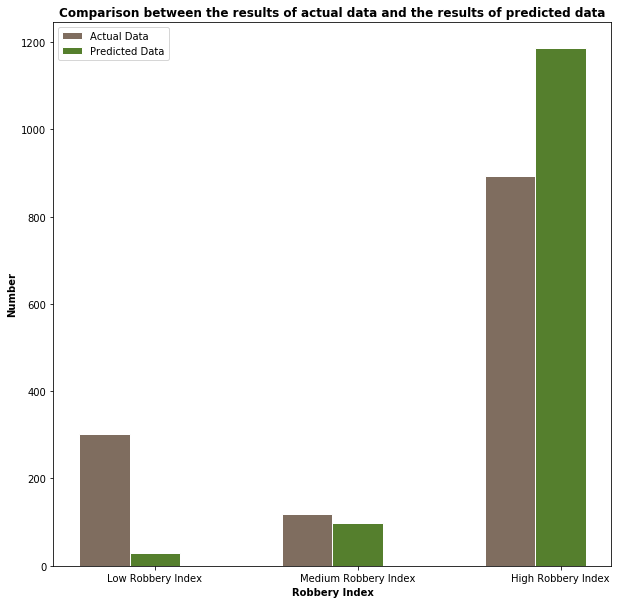

In [181]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x_l = (predicted_chicago_income_robbery
       [predicted_chicago_income_robbery.get('robbery_index_level') == 'Low Robbery Index'].shape[0])
x_m = (predicted_chicago_income_robbery
       [predicted_chicago_income_robbery.get('robbery_index_level') == 'Medium Robbery Index'].shape[0])
x_h = (predicted_chicago_income_robbery
       [predicted_chicago_income_robbery.get('robbery_index_level') == 'High Robbery Index'].shape[0])

y_l = (predicted_chicago_income_robbery
       [predicted_chicago_income_robbery.get('predicted_robbery_index_level') == 'Low Robbery Index'].shape[0])
y_m = (predicted_chicago_income_robbery
       [predicted_chicago_income_robbery.get('predicted_robbery_index_level') == 'Medium Robbery Index'].shape[0])
y_h = (predicted_chicago_income_robbery
       [predicted_chicago_income_robbery.get('predicted_robbery_index_level') == 'High Robbery Index'].shape[0])

# set width of bar
barWidth = 0.25

number_actual = [x_l, x_m, x_h]
number_predicted = [y_l, y_m, y_h]

# Set position of bar on X axis
r1 = np.arange(len(number_actual))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, number_actual, color='#7f6d5f', width=barWidth, edgecolor='white', label='Actual Data')
plt.bar(r2, number_predicted, color='#557f2d', width=barWidth, edgecolor='white', label='Predicted Data')
 
# Add xticks on the middle of the group bars
plt.title('Comparison between the results of actual data and the results of predicted data', fontweight='bold')
plt.xlabel('Robbery Index', fontweight='bold')
plt.ylabel('Number', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(number_actual))], ['Low Robbery Index', 'Medium Robbery Index', 'High Robbery Index'])
 
# Create legend & Show graphic
plt.legend()
plt.gcf().set_size_inches((10, 10))
plt.show()




# Testing the accuracy of our regression line

In [182]:
testing_results = np.array([])

for x in np.arange(predicted_chicago_income_robbery.shape[0]):
    if (predicted_chicago_income_robbery.get('robbery_index_level').iloc[x] 
        == predicted_chicago_income_robbery.get('predicted_robbery_index_level').iloc[x]
       ):
        testing_results = np.append(testing_results, 'True')
    else:
        testing_results = np.append(testing_results, 'False')
        
testing_results

accuracy_rate = np.count_nonzero(testing_results == 'True') / testing_results.shape[0]
accuracy_rate 

0.6532319391634981

# After comparing the results between robbery_index_level and predicted_robbery_index_level, we find that our regression line predicts correctly in about 65.3% of the time, which is closed to the average accuracy score for our second combination we calculated by cross validation.

# Thank you for reading our project!!!!
# For our Professor Fleischer and our TAs: 

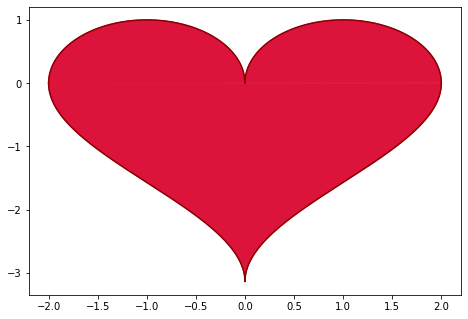

In [183]:
heart = np.arange(-2, 2, 0.00001)
heart_1 = np.sqrt(1-(abs(heart)-1)**2)
heart_2 = np.arccos(1-abs(heart)) - np.pi
plt.plot(heart, heart_1, color = 'darkred')
plt.plot(heart, heart_2, color = 'darkred')
plt.fill(heart, heart_1, color = 'crimson')
plt.fill(heart, heart_2, color = 'crimson')
plt.subplots_adjust(0,0,1,1)
plt.show()